In [4]:
# import libraries

import pandas as pd
import statistics as st
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

In [2]:
# reads imported excel

df = pd.read_excel(r"C:\workspace\Maroon Capital\MSFT.xlsx")

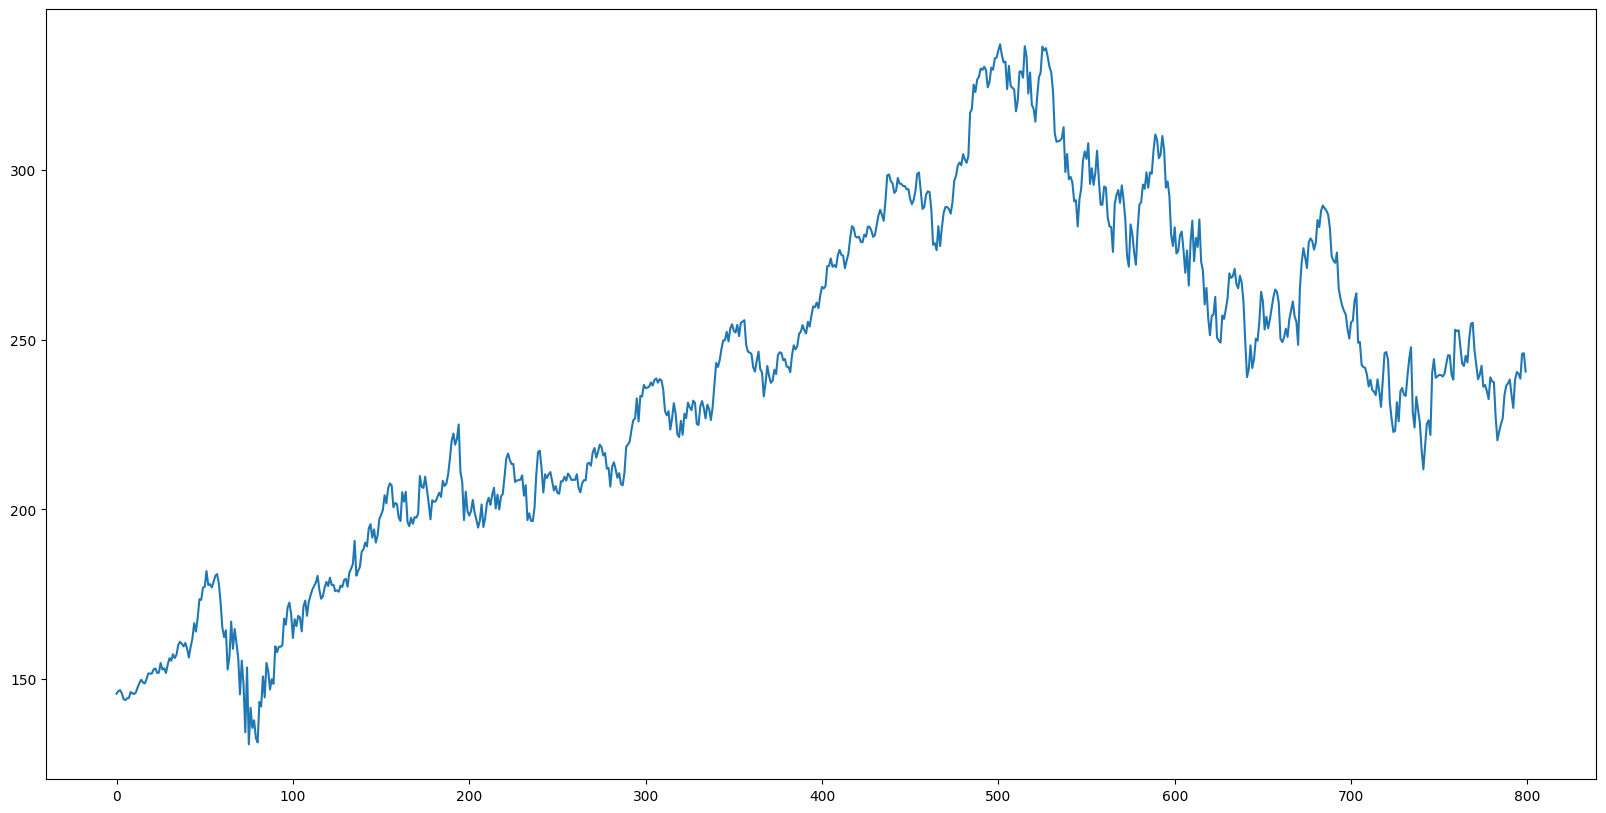

In [3]:
# original data trends

adjclose = []

for i in range(200, 1000):
    adjclose.append(df.iloc[i][6])
adjclose = np.array(adjclose)

plt.figure(figsize = (20, 10))
plt.plot(adjclose)
plt.show()

In [4]:
# gets twitter sentiment score

def ts_score(time):
    return df.iloc[time][8]

In [5]:
# calculates current trend

list_5 = []
list_20 = []

def cur_trend(time):
    for i in range(time - 5, time):
        list_5.append(df.iloc[i][6])
    sma_5 = sum(tuple(list_5)) / 5

    for i in range(time - 20, time):
        list_20.append(df.iloc[i][6])
    sma_20 = sum(tuple(list_20)) / 20  

    cur_trend = sma_5 - sma_20
    
    return cur_trend

In [6]:
# gets weighted past data and sentiments for training

def get_info(time):
    p_data = []

    for i in range(1, 21):
        p_data.append((df.iloc[time + 1 - i][6]))
        p_data.append((df.iloc[time + 1 - i][8]))
    p_data.append(df.iloc[time + 1][6])
    
    return p_data

In [7]:
# calculates threshold

up = []
down = []

def threshold():
    for i in range(20, 600):
        if df.iloc[i - 1][6] - df.iloc[i][6] <= 0:
            up.append(df.iloc[i][8])
        else:
            down.append(df.iloc[i][8])

    threshold = (st.median(up) + st.median(down)) / 2

    return threshold

th = threshold()

In [8]:
# splits training data points

pos = []
neg = []

for i in range(20, 800):
    if df.iloc[i][8] >= th:
        pos.append(i)
    else:
        neg.append(i)

In [10]:
# creates up and down training dataframe

column = []
for num in range(1, 41):
    column.append(str(num))
column.append("Test")

pos_up = pd.DataFrame(columns = column)
for val in pos:
    pos_up.loc[len(pos_up)] = get_info(val)

neg_down = pd.DataFrame(columns = column)
for val in neg:
    neg_down.loc[len(neg_down)] = get_info(val)

In [11]:
# dataset up

X_train_up = pos_up.to_numpy()[:, :-1]
y_train_up = pos_up.to_numpy()[:, -1]

X_up = X_train_up.reshape((len(pos_up), X_train_up.shape[1], 1)).astype(np.float32)[:int(len(pos_up)* 0.7)]
Y_up = y_train_up.astype(np.float32)[:int(len(pos_up) * 0.7)]

X_val_up = X_train_up.reshape((len(pos_up), X_train_up.shape[1], 1)).astype(np.float32)[int(len(pos_up) * 0.7):]
Y_val_up = y_train_up.astype(np.float32)[int(len(pos_up) * 0.7):]

In [12]:
# 4-layered neural network up

model_up = Sequential([layers.Input((40, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model_up.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model_up.fit(X_up, Y_up, validation_data=(X_val_up, Y_val_up), epochs=100)



Epoch 1/100


7/7 [==============================] - 5s 160ms/step - loss: 31523.3145 - mean_absolute_error: 174.1925 - val_loss: 55196.9219 - val_mean_absolute_error: 234.2824
Epoch 2/100
7/7 [==============================] - 0s 41ms/step - loss: 31267.8457 - mean_absolute_error: 173.4618 - val_loss: 54853.0898 - val_mean_absolute_error: 233.5488
Epoch 3/100
7/7 [==============================] - 0s 32ms/step - loss: 30972.4180 - mean_absolute_error: 172.5958 - val_loss: 54366.4766 - val_mean_absolute_error: 232.5061
Epoch 4/100
7/7 [==============================] - 0s 28ms/step - loss: 30549.3262 - mean_absolute_error: 171.3477 - val_loss: 53677.6367 - val_mean_absolute_error: 231.0220
Epoch 5/100
7/7 [==============================] - 0s 53ms/step - loss: 29950.7383 - mean_absolute_error: 169.5633 - val_loss: 52715.3750 - val_mean_absolute_error: 228.9349
Epoch 6/100
7/7 [==============================] - 0s 38ms/step - loss: 29130.1641 - mean_absolute_error: 167.0819 - val_loss

In [13]:
# dataset down

X_train_down = neg_down.to_numpy()[:, :-1]
y_train_down = neg_down.to_numpy()[:, -1]

X_down = X_train_down.reshape((len(neg_down), X_train_up.shape[1], 1)).astype(np.float32)[:int(len(neg_down)* 0.7)]
Y_down = y_train_down.astype(np.float32)[:int(len(neg_down) * 0.7)]

X_val_down = X_train_down.reshape((len(neg_down), X_train_up.shape[1], 1)).astype(np.float32)[int(len(neg_down) * 0.7):]
Y_val_down = y_train_down.astype(np.float32)[int(len(neg_down) * 0.7):]

In [14]:
# 4-layered neural network down

from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

model_down = Sequential([layers.Input((40, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model_down.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model_down.fit(X_down, Y_down, validation_data=(X_val_down, Y_val_down), epochs=100)

Epoch 1/100
11/11 [==============================] - 4s 88ms/step - loss: 36091.6094 - mean_absolute_error: 180.9742 - val_loss: 92924.6562 - val_mean_absolute_error: 304.2925
Epoch 2/100
11/11 [==============================] - 0s 23ms/step - loss: 35837.2188 - mean_absolute_error: 180.2705 - val_loss: 92494.1953 - val_mean_absolute_error: 303.5774
Epoch 3/100
11/11 [==============================] - 0s 24ms/step - loss: 35516.4023 - mean_absolute_error: 179.3727 - val_loss: 91777.4141 - val_mean_absolute_error: 302.3820
Epoch 4/100
11/11 [==============================] - 0s 24ms/step - loss: 34969.9492 - mean_absolute_error: 177.8260 - val_loss: 90332.1250 - val_mean_absolute_error: 299.9577
Epoch 5/100
11/11 [==============================] - 0s 24ms/step - loss: 33806.7656 - mean_absolute_error: 174.4890 - val_loss: 87445.0156 - val_mean_absolute_error: 295.0526
Epoch 6/100
11/11 [==============================] - 0s 23ms/step - loss: 31461.9180 - mean_absolute_error: 167.6017 - v

In [15]:
# gets weighted past data and sentiments for testing

def get_test_info(time):
    p_data = []

    for i in range(1, 21):
        p_data.append(df.iloc[time + 1 - i][6])
        p_data.append(df.iloc[time + 1 - i][8])
    
    return p_data

In [17]:
# policy search algorithm

def policy_search(time):
    x = [get_test_info(time)]
    if ts_score(time) - th >= 0:
        pred = model_up.predict(x).flatten()
        return float(pred[0])
    else:
        pred = model_down.predict(x).flatten()
        return float(pred[0])

1/1 [==============================] - 0s 66ms/step


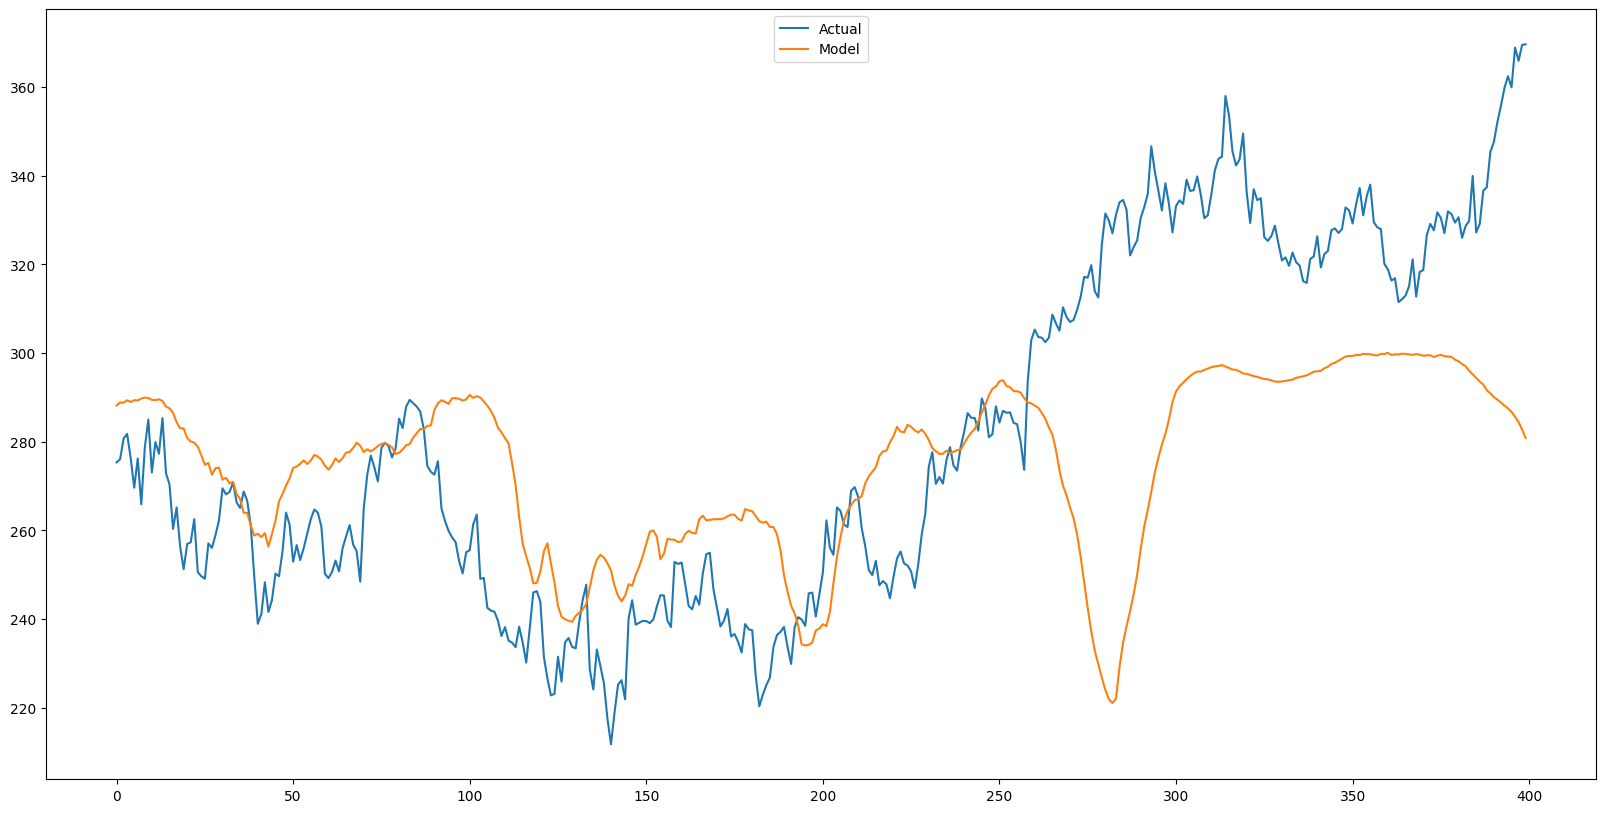

In [18]:
# visualization of test results

act_adjclose = []
test_adjclose = []

for i in range(800, 1200):
    act_adjclose.append((df.iloc[i + 1][6]))
    test_adjclose.append(policy_search(i))
act_adjclose = np.array(act_adjclose)
test_adjclose = np.array(test_adjclose)

plt.figure(figsize = (20, 10))
plt.plot(act_adjclose, label = "Actual")
plt.plot(test_adjclose, label = "Model")
leg = plt.legend(loc = 'upper center')
plt.show()